In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('dataset.csv')
df.head()
#print the first 5 rows

,bbcid,system,summary,is_factual,worker_id
0,29911712,BERTS2S,more than 50 pupils at a bristol academy have ...,no,wid_0
1,29911712,BERTS2S,more than 50 pupils at a bristol academy have ...,no,wid_1
2,29911712,BERTS2S,more than 50 pupils at a bristol academy have ...,no,wid_2
3,38505171,BERTS2S,the wife of a british-iranian woman jailed in ...,no,wid_0
4,38505171,BERTS2S,the wife of a british-iranian woman jailed in ...,no,wid_1


# Pre-Processing

Following are the steps for pre-processing done below:
- Data Cleaning (remove Nan rows)
- Aggregation of Labels (for each bbcid assign the most frequent label)
- Remove Duplicates
- Binary Encoding (assigning 0 and 1 to is_factual label)
- Text (summary) pre-processing by converting to lowercase, removing punctuation, removing stopwords, and then finally tokenization.


In [ ]:
# data cleaning

def data_cleaning(df):
  # remove Nan rows
  df = df.dropna()
  return df

df= data_cleaning(df)
df.head()

,bbcid,system,summary,is_factual,worker_id
0,29911712,BERTS2S,more than 50 pupils at a bristol academy have ...,no,wid_0
1,29911712,BERTS2S,more than 50 pupils at a bristol academy have ...,no,wid_1
2,29911712,BERTS2S,more than 50 pupils at a bristol academy have ...,no,wid_2
3,38505171,BERTS2S,the wife of a british-iranian woman jailed in ...,no,wid_0
4,38505171,BERTS2S,the wife of a british-iranian woman jailed in ...,no,wid_1


In [ ]:
# aggregate multiple labels
#For each unique bbcID and system, calculate how many "yes" and "no" labels from the workers.
#Assign the most frequent label to that summary.

def aggregate_labels(df):
  df['is_factual'] = df.groupby(['bbcid', 'system'])['is_factual'].transform(lambda x: x.value_counts().idxmax() if not x.empty else pd.NA) #This change ensures you won't get an empty sequence. In case of an empty sequence a pd.NA value will be placed instead and this shouldn't break your pipeline.
  return df

df = aggregate_labels(df)
df.head()

,bbcid,system,summary,is_factual,worker_id
0,29911712,BERTS2S,more than 50 pupils at a bristol academy have ...,no,wid_0
1,29911712,BERTS2S,more than 50 pupils at a bristol academy have ...,no,wid_1
2,29911712,BERTS2S,more than 50 pupils at a bristol academy have ...,no,wid_2
3,38505171,BERTS2S,the wife of a british-iranian woman jailed in ...,no,wid_0
4,38505171,BERTS2S,the wife of a british-iranian woman jailed in ...,no,wid_1


In [ ]:
def remove_duplicates(df):
  df = df.drop_duplicates(subset=['bbcid', 'system'])
  return df

df = remove_duplicates(df)
df.head()

,bbcid,system,summary,is_factual,worker_id
0,29911712,BERTS2S,more than 50 pupils at a bristol academy have ...,no,wid_0
3,38505171,BERTS2S,the wife of a british-iranian woman jailed in ...,no,wid_0
6,38156376,BERTS2S,police searching for a greenock woman who has ...,no,wid_0
9,27838706,BERTS2S,aberdeen have appointed arbroath boss paul she...,yes,wid_0
12,37554205,BERTS2S,a six-year-old girl from cheshire who was give...,no,wid_0


## Binary Encoding : Class Labels
is_factual = "yes" → 1 (Not hallucinated)

is_factual = "no" → 0 (Hallucinated)


In [ ]:
def binary_encoding(df):
  df['is_factual'] = df['is_factual'].map({'yes': 1, 'no': 0})
  return df

df = binary_encoding(df)
df.head()

,bbcid,system,summary,is_factual,worker_id
0,29911712,BERTS2S,more than 50 pupils at a bristol academy have ...,0,wid_0
3,38505171,BERTS2S,the wife of a british-iranian woman jailed in ...,0,wid_0
6,38156376,BERTS2S,police searching for a greenock woman who has ...,0,wid_0
9,27838706,BERTS2S,aberdeen have appointed arbroath boss paul she...,1,wid_0
12,37554205,BERTS2S,a six-year-old girl from cheshire who was give...,0,wid_0


In [ ]:
# preprocess text i.e summary
#pre-processing
import nltk as nl
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
import string
nl.download('punkt')
nl.download('stopwords')
nl.download('wordnet')

def preprocess(df):
  # convert to lowercase
  df['summary'] = df['summary'].str.lower()
  # clean text : remove punctuation and digits
  df['summary'] = df['summary'].apply(lambda x: re.sub(r'[^\w\s]', '', x))
  # remove punctuation
  df['summary'] = df['summary'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
  # tokenize
  df['summary'] = df['summary'].apply(lambda x: nl.word_tokenize(x))
  # remove stopwords
  stop_words = set(stopwords.words('english'))
  df['summary'] = df['summary'].apply(lambda x: [word for word in x if word not in stop_words])
  # lemmatization
  #lemmatizer = WordNetLemmatizer()
  #df['summary'] = df['summary'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
  return df

df = preprocess(df)
df.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,bbcid,system,summary,is_factual,worker_id
0,29911712,BERTS2S,"[50, pupils, bristol, academy, sent, home, sch...",0,wid_0
3,38505171,BERTS2S,"[wife, britishiranian, woman, jailed, iran, ca...",0,wid_0
6,38156376,BERTS2S,"[police, searching, greenock, woman, missing, ...",0,wid_0
9,27838706,BERTS2S,"[aberdeen, appointed, arbroath, boss, paul, sh...",1,wid_0
12,37554205,BERTS2S,"[sixyearold, girl, cheshire, given, rare, form...",0,wid_0


# Feature Extraction using tf-idf
- calculate term frequency
- calculate inverse document frequency
- multiply both to get tf-idf matrix

In [ ]:
# feature extraction usign tf-idf

def calculate_term_frequency(df):
  term_frequency = df['summary'].apply(lambda x: pd.Series(x).value_counts())
  term_frequency = term_frequency.fillna(0)
  return term_frequency

term_frequency = calculate_term_frequency(df)
term_frequency


,50,pupils,bristol,academy,sent,home,school,lack,uniform,wife,...,liberty,banker,topple,twoandahalf,plane,planes,radiocommunication,remote,neighbourhoods,gamesspot
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5582,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5585,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
5588,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
5591,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
def calculate_inverse_document_frequency(df):
  inverse_document_frequency = df['summary'].apply(lambda x: pd.Series(x).value_counts(normalize=True))
  inverse_document_frequency = inverse_document_frequency.fillna(0)
  return inverse_document_frequency

inverse_document_frequency = calculate_inverse_document_frequency(df)
inverse_document_frequency

,50,pupils,bristol,academy,sent,home,school,lack,uniform,wife,...,liberty,banker,topple,twoandahalf,plane,planes,radiocommunication,remote,neighbourhoods,gamesspot
0,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.111111,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5582,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,...,0.0,0.1,0.1,0.1,0.0,0.0,0.0,0.000000,0.000000,0.000000
5585,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.1,0.1,0.1,0.000000,0.000000,0.000000
5588,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.090909,0.090909,0.000000
5591,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000


In [ ]:
def tf_idf():
  tf_idf = term_frequency * inverse_document_frequency
  return tf_idf

tf_idf = tf_idf()
tf_idf

,50,pupils,bristol,academy,sent,home,school,lack,uniform,wife,...,liberty,banker,topple,twoandahalf,plane,planes,radiocommunication,remote,neighbourhoods,gamesspot
0,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.111111,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5582,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,...,0.0,0.1,0.1,0.1,0.0,0.0,0.0,0.000000,0.000000,0.000000
5585,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.1,0.1,0.1,0.000000,0.000000,0.000000
5588,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.090909,0.090909,0.000000
5591,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000


# Logistic Regression Model Training

## Input (X, y):
- X: The feature matrix, obtained from tf-idf
- y: The target vector, which contains 'is_factual' label values.

## Functions
- sigmoid function
- compute cost function (for cross-entrpy loss)
- compute gradient function (for gradient descent)
- logistic regression function (with alpha=0.01 and 2000 epochs)

In [ ]:
#feature matrix
X = tf_idf.values
#target vector
y = df['is_factual'].values

In [ ]:
# apply logistic regression

import numpy as np

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(np.dot(X, theta))
    cost = (-1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return cost

def compute_gradient(X, y, theta):
    m = len(y)
    h = sigmoid(np.dot(X, theta))
    gradient = (1/m) * np.dot(X.T, (h - y))
    return gradient

def logistic_regression(X, y, learning_rate=0.01, iterations=2000):
    m, n = X.shape
    theta = np.zeros(n)
    cost_history = []
    cost_history = np.append(cost_history, compute_cost(X, y, theta))
    for i in range(iterations):
        gradient = compute_gradient(X, y, theta)
        theta -= learning_rate * gradient
        cost_history = np.append(cost_history, compute_cost(X, y, theta))
    return theta, cost_history


In [ ]:
theta, cost_history = logistic_regression(X, y)
theta

array([-0.00157537, -0.00294049, -0.00669995, ..., -0.00048762,
       -0.00048762, -0.00044786])

# Prediction function

Predict using the logistic regression model and pass the learned weights to the sigmoid function.

Threshold = 0.5

     0 <= prob < 0.5   ~ 0 (is_factual is no)

     0.5 <= prob <=1   ~ 1 (is_factual is yes)


In [ ]:
# prediction using logistic regression model
def predict(X, theta):
  probs = sigmoid(np.dot(X, theta))
  return [1 if p >= 0.5 else 0 for p in probs]

y_pred = predict(X,theta)
y_pred

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


# Model Evaluation
Confusion Matrix

In [ ]:
# visualize confusion matrix
!pip install matplotlib seaborn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


#evaluate the model
def calculate_metrics(y_true, y_pred):
    TP = TN = FP = FN = 0

    # populate confusion matrix
    for true, pred in zip(y_true, y_pred):
        if true == 1 and pred == 1:
            TP += 1
        elif true == 0 and pred == 0:
            TN += 1
        elif true == 0 and pred == 1:
            FP += 1
        elif true == 1 and pred == 0:
            FN += 1

    # Calculate Accuracy
    accuracy = (TP + TN) / (TP + TN + FP + FN)

    # Calculate Precision, Recall, and F1-Score
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1_score:.4f}")

    cm = confusion_matrix(y_true, y_pred)

    # Visualize confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=['Predicted 0', 'Predicted 1'],
                yticklabels=['Actual 0', 'Actual 1'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    return accuracy, precision, recall, f1_score

Accuracy: 0.8999
Precision: 0.0000
Recall: 0.0000
F1-Score: 0.0000


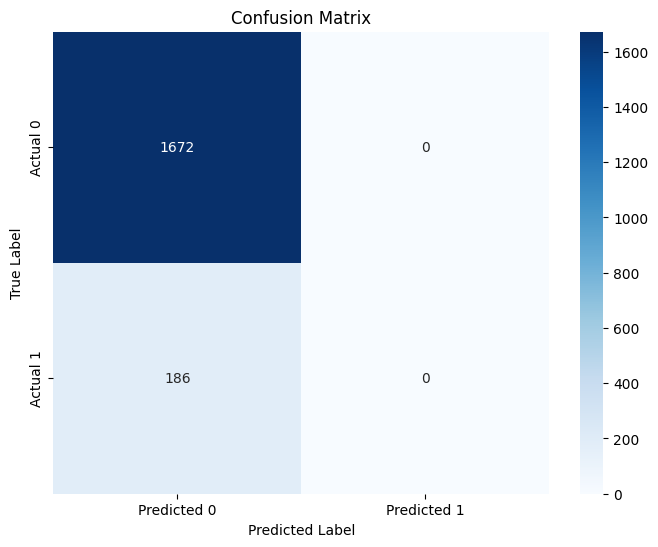

(0.8998923573735199, 0, 0.0, 0)

In [ ]:
calculate_metrics(y, y_pred)

# RESULT

> Model is predicting almost all instances as negative due to class imbalance, leading to high accuracy but poor performance in identifying the positive class (hence 0 precision, recall, and F1-score). Addressing class imbalance should improve these metrics.

**Accuracy:** 0.8999

**Precision:** 0.0000

**Recall:** 0.0000

**F1-Score:** 0.0000






# K-Folds Cross Validation with 5 folds

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

def k_fold_cross_validation(X, y, k, learning_rate, iterations):
    kf = KFold(n_splits=k, shuffle=True, random_state=42)  # shuffle
    performance_metrics = []
    accuracy_scores = []

    for train_index, val_index in kf.split(X):
        # Split into training and validation sets
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]

        # Train model
        theta, cost_history = logistic_regression(X_train, y_train, learning_rate=learning_rate, iterations=iterations)

        # Predict on validation set
        y_pred = predict(X_val, theta)

        # Calculate performance metrics
        accuracy = accuracy_score(y_val, y_pred)
        precision = precision_score(y_val, y_pred)
        recall = recall_score(y_val, y_pred)
        f1 = f1_score(y_val, y_pred)

        accuracy_scores.append(accuracy)
        performance_metrics.append((accuracy, precision, recall, f1))


    # Average accuracy and standard deviation across all folds
    avg_accuracy = np.mean(accuracy_scores)
    std_accuracy = np.std(accuracy_scores)

    return avg_accuracy, std_accuracy, accuracy_scores

In [ ]:
k = 5 # folds
learning_rate = 0.01
iterations = 2000

# Perform k-fold cross-validation
avg_accuracy, std_accuracy, accuracy_scores = k_fold_cross_validation(X, y, k, learning_rate, iterations)

print(f"Average Accuracy: {avg_accuracy:.4f}")
print(f"Standard Deviation of Accuracy: {std_accuracy:.4f}")

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Average Accuracy: 0.8994
Standard Deviation of Accuracy: 0.0259


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Average Accuracy: 0.8994
Standard Deviation of Accuracy: 0.0259


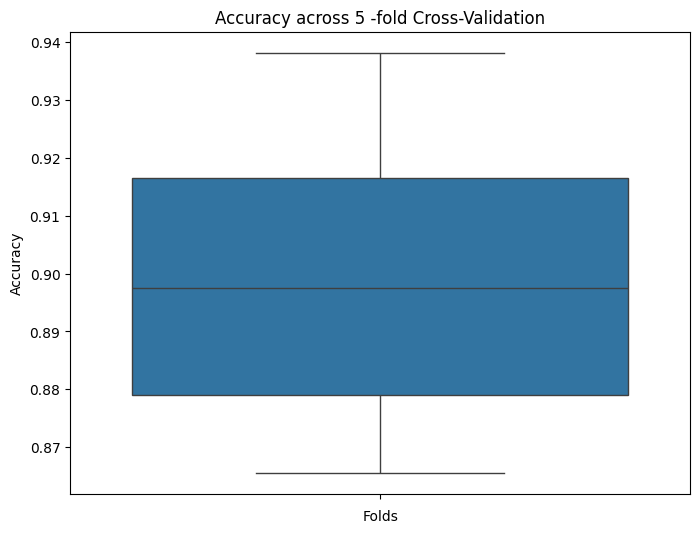

In [ ]:
# Visualize accuracy scores across folds
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_cross_validation_results(accuracy_scores, k):
  print(f"Average Accuracy: {avg_accuracy:.4f}")
  print(f"Standard Deviation of Accuracy: {std_accuracy:.4f}")
  plt.figure(figsize=(8, 6))
  sns.boxplot(data=accuracy_scores)  # Boxplot for accuracy scores
  plt.title(f'Accuracy across {k} -fold Cross-Validation')
  plt.xlabel('Folds')
  plt.ylabel('Accuracy')
  plt.show()

visualize_cross_validation_results(accuracy_scores, 5)

Average Accuracy: 0.8994
Standard Deviation of Accuracy: 0.0259


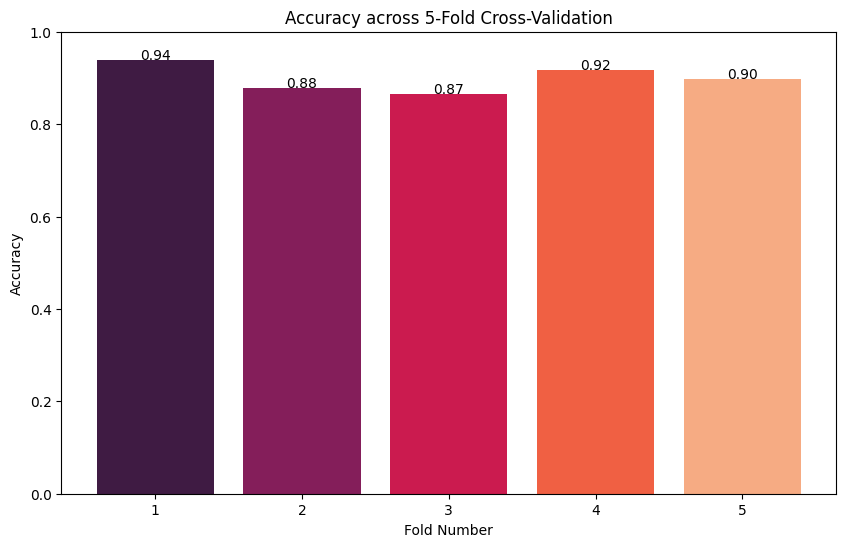

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def visualize_cross_validation_results(accuracy_scores, k):
    print(f"Average Accuracy: {np.mean(accuracy_scores):.4f}")
    print(f"Standard Deviation of Accuracy: {np.std(accuracy_scores):.4f}")
    plt.figure(figsize=(10, 6))
    colors = sns.color_palette("rocket", k)
    plt.bar(range(1, k + 1), accuracy_scores, color=colors)

    # bars with the accuracy score
    for i, score in enumerate(accuracy_scores):
        plt.text(i + 1, score + 0.001, f"{score:.2f}", ha='center', fontsize=10)

    plt.title(f'Accuracy across {k}-Fold Cross-Validation')
    plt.xlabel('Fold Number')
    plt.ylabel('Accuracy')
    plt.ylim(0, 1)
    plt.show()

visualize_cross_validation_results(accuracy_scores, 5)

# Error Analysis

## Misclassifications identified
From the confusion matrix, the model's predictions indicate the following:

- True Negatives (TN): 1672 instances were correctly identified as negative, indicating that these instances did not belong to the positive class.
- False Positives (FP): 0 instances were incorrectly predicted as positive, indicating no errors in predicting negative instances as positive.
- **False Negatives (FN): 186** instances were misclassified as negative, even though they actually belonged to the positive class. This indicates that the model is failing to detect the positive class accurately.
- **True Positives (TP): 0** instances were correctly identified as positive, indicating that the model did not successfully recognize any positive instances.

> As is clear from the confuson matrix the model is **highly biased towards predicting the negative class**, and **misclassifies positive class**. Hence the complete lack of correctly predicted positive cases (TP = 0).

## Why the model failed?
Due to **class imbalance**, the model misclassifies.
Leading to high accuracy but poor performance in identifying the positive class (hence 0 precision, recall, and F1-score).

Addressing class imbalance should improve these metrics.


## Class Imbalance Visualization

Bar graph and Pie chart for class distribution in the dataset

<ipython-input-55-6ad6de6160cf>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=unique, y=counts, palette="inferno")


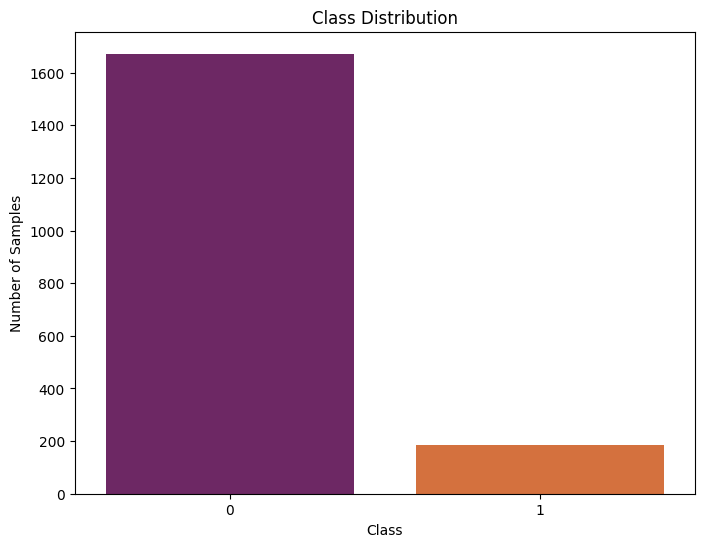

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


def plot_class_distribution(y):
    unique, counts = np.unique(y, return_counts=True)
    plt.figure(figsize=(8, 6))
    sns.barplot(x=unique, y=counts, palette="inferno")
    plt.title("Class Distribution")
    plt.xlabel("Class")
    plt.ylabel("Number of Samples")
    plt.show()

plot_class_distribution(y)

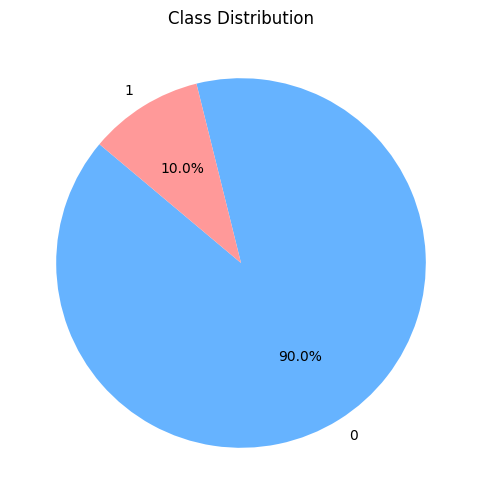

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


def plot_class_distribution_pie(y):
    unique, counts = np.unique(y, return_counts=True)
    plt.figure(figsize=(8, 6))
    plt.pie(counts, labels=unique, autopct='%1.1f%%', startangle=140, colors=["#66b3ff", "#ff9999"])
    plt.title("Class Distribution")
    plt.show()

plot_class_distribution_pie(y)

# Improvements

## 0. Class Weighting
 Reaallyy bad, gave same results, even worse

## 1. Threshold Tuning
- Lower prediction threshold to 0.499

In [ ]:
# prediction threshold lowered
def predict(X, theta):
  probs = sigmoid(np.dot(X, theta))
  return [1 if p >= 0.499 else 0 for p in probs]

y_pred = predict(X,theta)

Accuracy: 0.8794
Precision: 0.2935
Recall: 0.1452
F1-Score: 0.1942


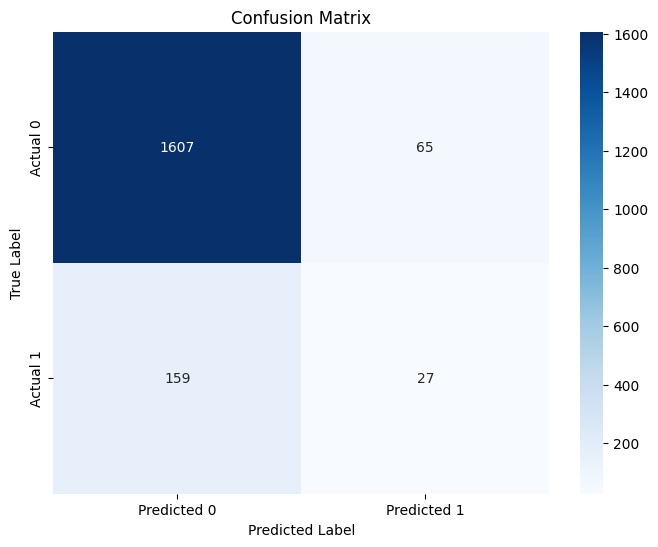

(0.8794402583423035,
 0.29347826086956524,
 0.14516129032258066,
 0.19424460431654678)

In [ ]:
calculate_metrics(y, y_pred)

##RESULT

Accuracy: 0.8794

Precision: 0.2935

Recall: 0.1452

F1-Score: 0.1942







## 2. Undersampling Majority Class

Resampled class distribution: {0: 186, 1: 186}


<ipython-input-55-6ad6de6160cf>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=unique, y=counts, palette="inferno")


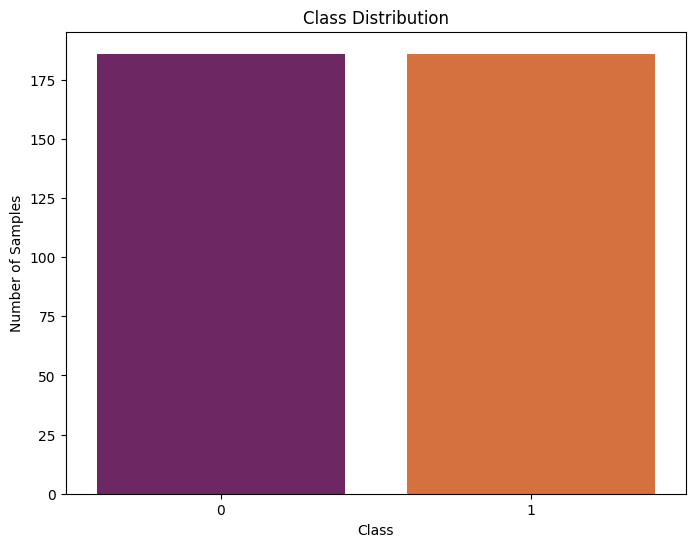

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
import numpy as np

def undersample_data(X, y):
    rus = RandomUnderSampler(random_state=42)
    X_resampled, y_resampled = rus.fit_resample(X, y)

    return X_resampled, y_resampled

X_resampled, y_resampled = undersample_data(X, y)

# the new class distribution
unique, counts = np.unique(y_resampled, return_counts=True)
print(f"Resampled class distribution: {dict(zip(unique, counts))}")
plot_class_distribution(y_resampled)


Accuracy: 0.8898
Precision: 0.8718
Recall: 0.9140
F1-Score: 0.8924


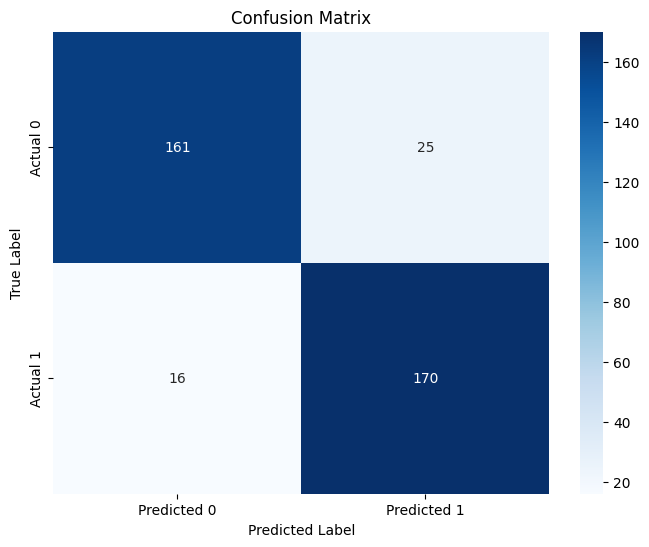

(0.8897849462365591,
 0.8717948717948718,
 0.9139784946236559,
 0.8923884514435695)

In [ ]:
new_theta, new_cost_history = logistic_regression(X_resampled, y_resampled)

def predict(X, theta):
  probs = sigmoid(np.dot(X, theta))
  return [1 if p >= 0.5 else 0 for p in probs]

y_resampled_pred = predict(X_resampled, new_theta)
calculate_metrics(y_resampled, y_resampled_pred)

## Summary of Improvements with Undersampling

**Updated Metrics:**

- Accuracy: 0.8898
- Precision: 0.8718
- Recall: 0.9140
- F1-Score: 0.8924

**Updated Confusion Matrix Values:**

- True Negatives (TN): 161
- False Positives (FP): 25
- False Negatives (FN): 16
- True Positives (TP): 170

*The F1-score increased to 89.24%, which indicates a good balance between precision and recall.*

# Conclusion:

> The undersampling technique has **addressed the class imbalance** effectively, and shows **significant improvement** in precision, recall, and F1-score. Confusion matrix shows that the model is now correctly predicting a higher number of positive instances and reducing false negatives and false positives.